In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.datasets import load_iris

In [2]:
flowers_df=sns.load_dataset('iris')

In [3]:
list(flowers_df.species.unique())

['setosa', 'versicolor', 'virginica']

In [4]:
flowers_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
flowers_df.sort_values('species',ascending=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,virginica
120,6.9,3.2,5.7,2.3,virginica
121,5.6,2.8,4.9,2.0,virginica
111,6.4,2.7,5.3,1.9,virginica


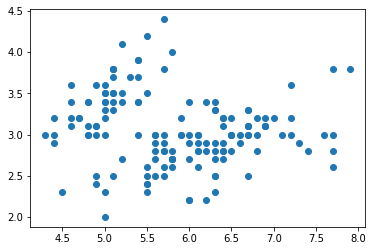

In [6]:
plt.scatter(flowers_df.sepal_length,flowers_df.sepal_width)


c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

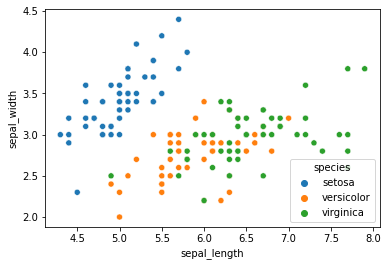

In [7]:
sns.scatterplot('sepal_length','sepal_width',hue='species',data=flowers_df)

k-NN

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

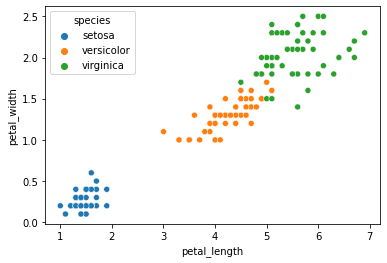

In [8]:
sns.scatterplot('petal_length','petal_width',hue='species',data=flowers_df)

.How does k-NN calculate distance from the points


1.euclididan distance method
line connecting 2 points

2. manhattan (taxicab geometry)
uses horizontal and vertical line

3. minkowski method
combination of euclididan and manhattan



In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
kNN = KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=1)
#by default n= 5 and p=2(minkowski)

#its very imp to to choose correct n_neighbors if we choose n=50
#accuracy will be 80%


In [11]:
x_df=flowers_df[['sepal_length','sepal_width','petal_length','petal_width']]

In [12]:
x_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y_df=flowers_df.species

In [14]:
y_df


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [15]:
#seperated x and y axis varialbles 
#and fit it in the kNN model
kNN.fit(x_df,y_df)

KNeighborsClassifier(n_neighbors=6, p=1)

In [16]:
#so our model will now guess the flower species based on the data which we gave 

In [17]:
sample_dataset1=np.array([[5.6,3.4,1.4,0.1]])
#we will test our model now
kNN.predict(sample_dataset1)

# here our model returned species setosa which is correct

array(['setosa'], dtype=object)

In [18]:
#again we will pick up random value from  the array and see if our moel satisy our requirement
sample_dataset2=np.array([[6.7,3.0,5.2,2.5]])
#entries of 145 th row
kNN.predict(sample_dataset2)

array(['virginica'], dtype=object)

In [19]:
flowers_df.tail(10)
#as we can verify that for 145 th row our species is virginica

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [20]:
#NOw wh ta if we give it not the xact value ubt some changed value
sample_dataset2=np.array([[6.9,3.2,5.2,2.5]])
# we have changed the values but now we wont be able to verify if our model is working or not
kNN.predict(sample_dataset2)


array(['virginica'], dtype=object)

In [21]:
#lecture 40

In [22]:
#we randomly select 20 %of the data for testing and 80% for training

from sklearn.model_selection import train_test_split

In [24]:
# we already sorted our data in x_df and y_df
# the order is important 
#names can change
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.2,random_state=88,shuffle=True,stratify=y_df)
#train size mentioning is not imp(80%)

#random state because each time it seleects same random test set otherwise

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [25]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
10,5.4,3.7,1.5,0.2
130,7.4,2.8,6.1,1.9
46,5.1,3.8,1.6,0.2
58,6.6,2.9,4.6,1.3
12,4.8,3.0,1.4,0.1
...,...,...,...,...
64,5.6,2.9,3.6,1.3
97,6.2,2.9,4.3,1.3
134,6.1,2.6,5.6,1.4
30,4.8,3.1,1.6,0.2


In [26]:
x_test
#random 20 samples for the testing

,sepal_length,sepal_width,petal_length,petal_width
92,5.8,2.6,4.0,1.2
66,5.6,3.0,4.5,1.5
128,6.4,2.8,5.6,2.1
126,6.2,2.8,4.8,1.8
50,7.0,3.2,4.7,1.4
106,4.9,2.5,4.5,1.7
74,6.4,2.9,4.3,1.3
111,6.4,2.7,5.3,1.9
84,5.4,3.0,4.5,1.5
20,5.4,3.4,1.7,0.2


In [27]:
# now wee will fit our knn model with our train data

knn=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6, p=1)

In [28]:
prediction=knn.predict(x_test)

In [29]:
y_test

92     versicolor
66     versicolor
128     virginica
126     virginica
50     versicolor
106     virginica
74     versicolor
111     virginica
84     versicolor
20         setosa
78     versicolor
107     virginica
143     virginica
102     virginica
109     virginica
24         setosa
71     versicolor
43         setosa
42         setosa
32         setosa
113     virginica
5          setosa
120     virginica
37         setosa
34         setosa
61     versicolor
88     versicolor
15         setosa
86     versicolor
33         setosa
Name: species, dtype: object

so we can verify that some of the values are incorrect but model mostly does its work
if(knn.predict(x_test)==y_test)
accuracy =100%

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc=accuracy_score(y_test,prediction)

In [32]:
print(f"So our model has {acc*100} % score")

So our model has 96.66666666666667 % score


In [33]:
#lecture 42
#decision tree
from sklearn.tree import DecisionTreeClassifier


In [34]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
tree_prediction=decision_tree.predict(x_test)

In [36]:
tree_prediction

array(['versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa'], dtype=object)

In [37]:
acc=accuracy_score(y_test,prediction)

In [38]:
acc
#so this model has an accuracy of 96 %

0.9666666666666667

# lecture 43
k-fold cross Validation

In [39]:
#implementing k- fold cross validation

from sklearn.model_selection import cross_val_score


In [40]:
# we need to use our x_df and y_df and it will automatically mplement 

scores_decision_tree=cross_val_score(decision_tree,x_df,y_df,cv=10)
#cross validation =10
#10 fold cross validation

In [41]:
scores_decision_tree

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [42]:
np.array(scores_decision_tree).mean()
# so now we accuracy of 96%

0.9533333333333334

# lecture 44
Naive bayes 
a probabilitic classifier

define a circle surrouunding points and see the count of points and types of diffrent categories present inside the circle
calculates probability of which species will flower belong

it calculates prob of each species 


In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
naive_bayes=GaussianNB()

In [45]:
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [46]:
prediction_nb=naive_bayes.predict(x_test)

In [47]:
prediction_nb

array(['versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [48]:
acc=accuracy_score(y_test,prediction_nb)

In [49]:
acc
#96 % accurate

0.9666666666666667

In [50]:
#cross validationg the model
scores_nb=cross_val_score(naive_bayes,x_df,y_df,cv=10)

In [51]:
np.array(scores_nb).mean()
# 95 % accurate

0.9533333333333334

Lecture 46
Logistic regression

Binary classification

In [52]:
from sklearn.datasets import load_breast_cancer

In [64]:
cancer_df=load_breast_cancer()

In [65]:
#cancer_df=pd.DataFrame(cancer_df,columns= cancer_df.data)

In [66]:

cancer_df 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

or we can  import the csv file drectly by using pandas or seaborn
here exmaple using pandas


In [68]:
x=cancer_df.data
y=cancer_df.target

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=88)

In [73]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [74]:
lr.fit(x_train,y_train)


c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
prediction_lr=lr.predict(x_test)
prediction_lr
#prediction is array of 0 and 1 becuase it can be breast canceer or not

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [79]:
acc=accuracy_score(y_test,prediction_lr)
acc
# so our model is 94% acccurate

0.9473684210526315

confusion matrix 
for binary classification 
true positive,true negative
false positive ,false negative

In [80]:
from sklearn.metrics import confusion_matrix,classification_report


In [86]:
conf_matrix=confusion_matrix(y_test,prediction_lr)
conf_matrix
#so the confusion matrix has a good accuracy


array([[ 53,   4],
       [  5, 109]], dtype=int64)

In [87]:
acc=(53+109)/(53+4+5+109)
acc

0.9473684210526315

In [84]:
class_report=classification_report(y_test,prediction_lr)
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        57
           1       0.96      0.96      0.96       114

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [88]:
#roc curve

from sklearn.metrics import roc_curve


In [110]:
y_prob=lr.predict_proba(x_test)
y_prob
#probability of cancer or not cancer 
#sum of 2 columns will be 1y_prob=y_prob

array([[6.43518747e-04, 9.99356481e-01],
       [9.99999979e-01, 2.13059667e-08],
       [2.33149049e-03, 9.97668510e-01],
       [1.00000000e+00, 1.33146950e-10],
       [1.76576735e-03, 9.98234233e-01],
       [6.37233480e-03, 9.93627665e-01],
       [3.91437703e-01, 6.08562297e-01],
       [6.43919058e-03, 9.93560809e-01],
       [9.99999996e-01, 3.60695192e-09],
       [9.99999495e-01, 5.05454597e-07],
       [4.57841320e-03, 9.95421587e-01],
       [5.87084087e-02, 9.41291591e-01],
       [1.00000000e+00, 7.65554125e-11],
       [9.99999601e-01, 3.98713283e-07],
       [9.99880703e-01, 1.19297068e-04],
       [9.99818371e-01, 1.81628930e-04],
       [9.84034754e-01, 1.59652460e-02],
       [1.79294536e-03, 9.98207055e-01],
       [1.71486323e-03, 9.98285137e-01],
       [3.14152984e-04, 9.99685847e-01],
       [6.08203318e-04, 9.99391797e-01],
       [9.99245410e-01, 7.54589754e-04],
       [8.89913868e-01, 1.10086132e-01],
       [4.96487347e-02, 9.50351265e-01],
       [3.219943

In [111]:


y_prob=y_prob[:,1:]
y_prob


array([[9.99356481e-01],
       [2.13059667e-08],
       [9.97668510e-01],
       [1.33146950e-10],
       [9.98234233e-01],
       [9.93627665e-01],
       [6.08562297e-01],
       [9.93560809e-01],
       [3.60695192e-09],
       [5.05454597e-07],
       [9.95421587e-01],
       [9.41291591e-01],
       [7.65554125e-11],
       [3.98713283e-07],
       [1.19297068e-04],
       [1.81628930e-04],
       [1.59652460e-02],
       [9.98207055e-01],
       [9.98285137e-01],
       [9.99685847e-01],
       [9.99391797e-01],
       [7.54589754e-04],
       [1.10086132e-01],
       [9.50351265e-01],
       [9.67800570e-01],
       [9.97126211e-01],
       [9.99842611e-01],
       [9.98226750e-01],
       [9.98836266e-01],
       [9.62723027e-01],
       [4.58534709e-06],
       [4.40406963e-23],
       [6.87167427e-01],
       [9.97437743e-01],
       [7.86330275e-01],
       [9.90046533e-01],
       [9.49188915e-01],
       [9.96512785e-01],
       [9.95633319e-01],
       [9.99709366e-01],


In [112]:
FPR,TPR,Thresholds=roc_curve(y_test,y_prob)

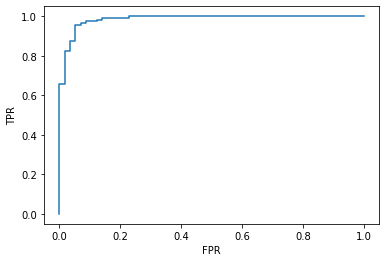

In [113]:
plt.plot(FPR,TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
#so we can see that its a good ROC curve
#so a good logistic regression model


In [115]:
# to calculate area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob)


0.9853801169590644